<a href="https://colab.research.google.com/github/chsachin799/100-days-of-ML/blob/main/52_Regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement (1).csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


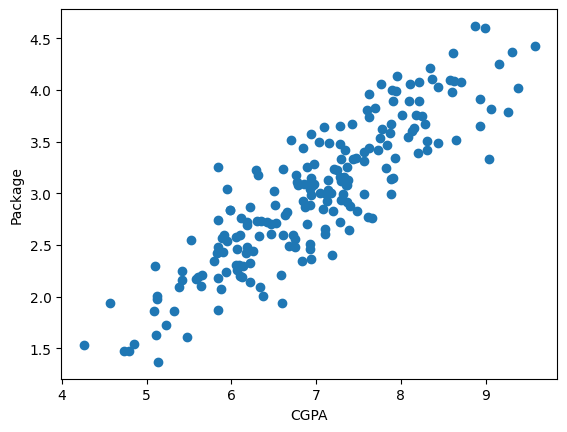

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [6]:
x = df.iloc[:,0:1]
y = df.iloc[:,1]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Packages')

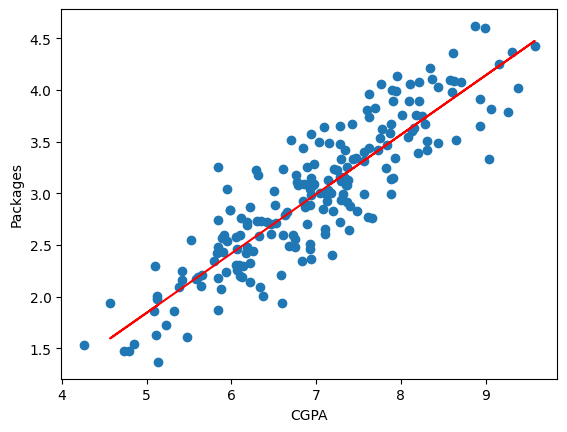

In [10]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Packages')

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
y_pred = lr.predict(x_test)

In [15]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [17]:
print("MAE: ",mean_absolute_error(y_test,y_pred)) #result is in terms of LPA

MAE:  0.23150985393278373


In [18]:
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  0.08417638361329656


In [20]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred))) # result is in LPA

RMSE:  0.2901316659954521


In [22]:
print("R2 Score: ",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score:  0.7730984312051673


In [23]:
#Adjusted R2 Score
x_test.shape

(40, 1)

In [24]:
1 - (((1-r2)*(40-1))/(40-1-1))

0.7671273372895138

We will be adding a new irrelevant column just to see how r2 and adjusted r2 changes.


In [25]:
df1 = df.copy()
df1['random_feature'] = np.random.random(200)
df1 = df1[['cgpa','random_feature','package']]
df1.head()

,cgpa,random_feature,package
0,6.89,0.361556,3.26
1,5.12,0.237259,1.98
2,7.82,0.681224,3.25
3,7.42,0.269320,3.67
4,6.94,0.337760,3.57


Text(0, 0.5, 'Packages')

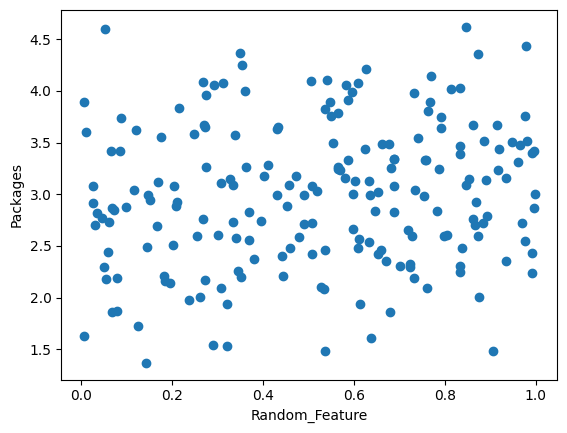

In [26]:
plt.scatter(df1['random_feature'],df['package'])
plt.xlabel('Random_Feature')
plt.ylabel('Packages')

In [27]:
x = df1.iloc[:,0:2]
y = df1.iloc[:,2]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(x_test)

In [33]:
print("R2 Score: ",r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)

R2 Score:  0.7500823458115617


In [34]:
1 - (((1-r2)*(40-1))/(40-1-2))

0.7365732834229975

Now we will be adding another column which wont be irrelevant and will be adding weight in the prediction

In [35]:
df2 = df.copy()
df2['iq'] = df2['package'] + (np.random.randint(-12,12,200)/10)
df2 = df2[['cgpa','iq','package']]

In [36]:
df2.head()

,cgpa,iq,package
0,6.89,2.56,3.26
1,5.12,0.88,1.98
2,7.82,2.15,3.25
3,7.42,3.07,3.67
4,6.94,3.47,3.57


Text(0, 0.5, 'Package')

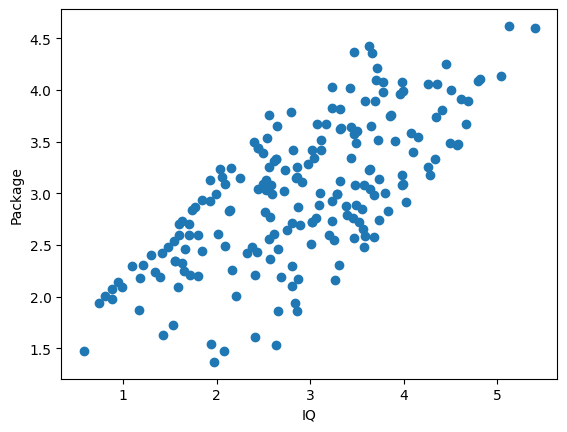

In [38]:
plt.scatter(df2['iq'],df['package'])
plt.xlabel('IQ')
plt.ylabel('Package')

In [40]:
np.random.randint(-100,100)

68

In [41]:
x = df2.iloc[:,0:2]
y =df.iloc[:,-1]


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [46]:
print("R2 Score: ",r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)

R2 Score:  0.8336957780413217


In [47]:
1 - (((1-r2)*(40-1))/(40-1-2))

0.8247063606381498